# Practical 4 - xAI Bias and Ethics

# Import relevant libraries

Start with importing the libraries which will be used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import os

# Scenario description

Autopilot scenario: 
Car driving towards pedestrian crossing
For one of the following reasons the car cannot avoid hitting a pedestrian, either via going straight ahead, or changing lanes: 
1. Break failure
2. Pedestrians were not detected early enough
3. The autopilot (AI) reached a state of confusion
4. The pedestrians suddenly and unexpectedly decided to cross the road
5. Suddently it started to rain heavily: autopilot got confused (sensors did not work well) and human driver did not have enough time to react
6. Any other reason
We will use a decision tree to reproduce this scenarion. 
This is a life and death moral dilemma. 
The decision tree will have to decide if it stays in the right lane (thus hitting and potentially fatally injuring more people), or turn swiftly to the left lane (thus potentially fatally injuring only one person). 
We will employ 4 attributes for this decision. 
f1: The level of security in the current (right lane). A high value indicates the light is green and no unexpected objects are on the road. 
f2: Limuted security in the current (right lane). If the value is high, then no pedestrians try to cross the road. If low, then there is a risk that pedestrians might cross the road. 
f3: The level of security in the other (left lane). A high value indicates the light is green and no unexpected objects are on the road. 
f4. Limited security in the other (left) lane. If the value is low, it means that pedestrians might be trying to cross the street. If the value is high, pedestrians are not detected at that point.

Reading the data

In [2]:
df = pd.read_csv('autopilot.csv')

In [3]:
df.head()

,0.51,0.41,0.21,0.41.1,0
0,0.11,0.31,0.91,0.11,1
1,1.02,0.51,0.61,0.11,0
2,0.41,0.61,1.02,0.61,1
3,1.02,0.91,0.41,0.31,0
4,0.71,0.41,0.91,1.02,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.51    3999 non-null   float64
 1   0.41    3999 non-null   float64
 2   0.21    3999 non-null   float64
 3   0.41.1  3999 non-null   float64
 4   0       3999 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 156.3 KB


Adding column names for better clarity

In [4]:
col_names = ['f1', 'f2', 'f3', 'f4','label']
attribute_col_names = ['f1', 'f2', 'f3', 'f4']

we have examined the dataset earlier and noticed that there is no header in the data; so we define a header and add it at the time of reading the dataset

In [5]:
autopilot_data_df = pd.read_csv('autopilot.csv', header=None, names=col_names)

In [6]:
autopilot_data_df.head()

,f1,f2,f3,f4,label
0,0.51,0.41,0.21,0.41,0
1,0.11,0.31,0.91,0.11,1
2,1.02,0.51,0.61,0.11,0
3,0.41,0.61,1.02,0.61,1
4,1.02,0.91,0.41,0.31,0


In [7]:
autopilot_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      4000 non-null   float64
 1   f2      4000 non-null   float64
 2   f3      4000 non-null   float64
 3   f4      4000 non-null   float64
 4   label   4000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 156.4 KB


Each attribute has value between 0 and 1. If the is high, i.e. close to 1, the attribute has a high probability that is true. So f1 = 0.9 means that the right lane is highly likely to be secure (security of the right lane is high). However, if f1 = 0.1, then the the righ lane is probably not secure (security level low). Our data has 4,000 records where combinations of f1-f4 are associated with 2 possible labeled outcomes: i.e. stay in righ lane, or go to left lane. So label=0 indicates that the best decision option is to stay in the right lane. If label=1, the best option is to switch to the left lane. 

As typically done in machine learning experiments, we will define our input (X) and output (y) attributes

In [8]:
X = autopilot_data_df[attribute_col_names] #independent variables 

In [9]:
y = autopilot_data_df.label #dependent variables of staying in the lane or not staying in the lane

In [10]:
print(X)

        f1    f2    f3    f4
0     0.51  0.41  0.21  0.41
1     0.11  0.31  0.91  0.11
2     1.02  0.51  0.61  0.11
3     0.41  0.61  1.02  0.61
4     1.02  0.91  0.41  0.31
...    ...   ...   ...   ...
3995  0.31  0.11  0.71  0.41
3996  0.21  0.71  0.71  1.02
3997  0.41  0.11  0.31  0.51
3998  0.31  0.71  0.61  1.02
3999  0.91  0.41  0.11  0.31

[4000 rows x 4 columns]


In [11]:
print(y)

0       0
1       1
2       0
3       1
4       0
       ..
3995    1
3996    1
3997    1
3998    1
3999    0
Name: label, Length: 4000, dtype: int64


Now we will split our dataset into training and test sub-sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

We will use a Decision Tree Classifier to classify the data records

In [13]:
estimator=DecisionTreeClassifier() # This defines a Decision Tree Classifier with default values

The Default Settings for the DecisionTreeClassifier are: 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
                       
The default settings do not control the tree size, so overfit is possible/likely.    

criterion='gini': We are applying the Gini impurity algorithm described earlier.
max_depth=None: There is no maximum depth that constricts the decision tree, which maximizes its size.
min_impurity_split=None: There is no minimum impurity split, which means that even small values will be taken into account. There is no constraint on expanding the size of a decision tree.

Below there is an alternative Decision Tree, with parametrised values. It is commented out but you can experiment also with it. 

In [96]:
# estimator = DecisionTreeClassifier(max_depth=2,max_leaf_nodes=3,min_samples_leaf=100) # here we set the decision tree parameters
# We could penalise the tree growth after building the tree (prune the tree)
# But we could also in advance restrict the tree growth
# The maximum depth of the tree is limited to 2. 
# The maximum number of leaf nodes is limited to 3
# We limit a single node to 100 records, after which the tree should grow (node splits)
# One of the two definitions is to be commented out - they are left on here just as an example - the last definition holds

In [97]:
# Now we train the Decision Tree

In [14]:
estimator = estimator.fit(X_train,y_train)

In [15]:
print("Decision")

Decision


In [16]:
y_pred = estimator.predict(X_test)

In [17]:
print(y_pred)

[0 0 1 ... 1 1 0]


Let's see how well the Decision Tree has learned 

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("R score", metrics.r2_score(y_test, y_pred))

Accuracy: 1.0
R score 1.0


In [103]:
# Note that Accuracy is not the best metric to employ in classification; however, here there are no misclassifications at all. 

Next we save the Trained Decision Tree

In [19]:
pickle.dump(estimator, open("dt_autopilot.pkl", 'wb'))

This saves the model. 
Technically this means that we can load and execute the model without a need to retrain it. 
But there is more: a tangible 'written' record of how a decision is reached becomes available. 
This tangible record, if the decision process is operationalised, can be scrutinised by moral, ethical, and legal viewpoints. 

# Inspecting the Decision Tree

In the next code we visualise the Decision Tree. 
This is useful because building a Decision Model is rarely a one-go process, but several steps of trial, test, error, and new trials are often needed. 

dpi will determine the dots per inch of your graph. The higher the resolution, the better a large Decision Tree can be inspected, even if needing to zoom in. 
Both figsize and dpi are related, and, as such, figsize will produce the same effects as dpi when you adjust the size of the graph.
You can overcome this problem with a trained model, and if the datasets are homogeneous, you can try different values of figsize and dpi until you find the ones that fit your needs.
We will now define the name of the labels of our features in an array:

We will now define the name of the labels of our features in an array:

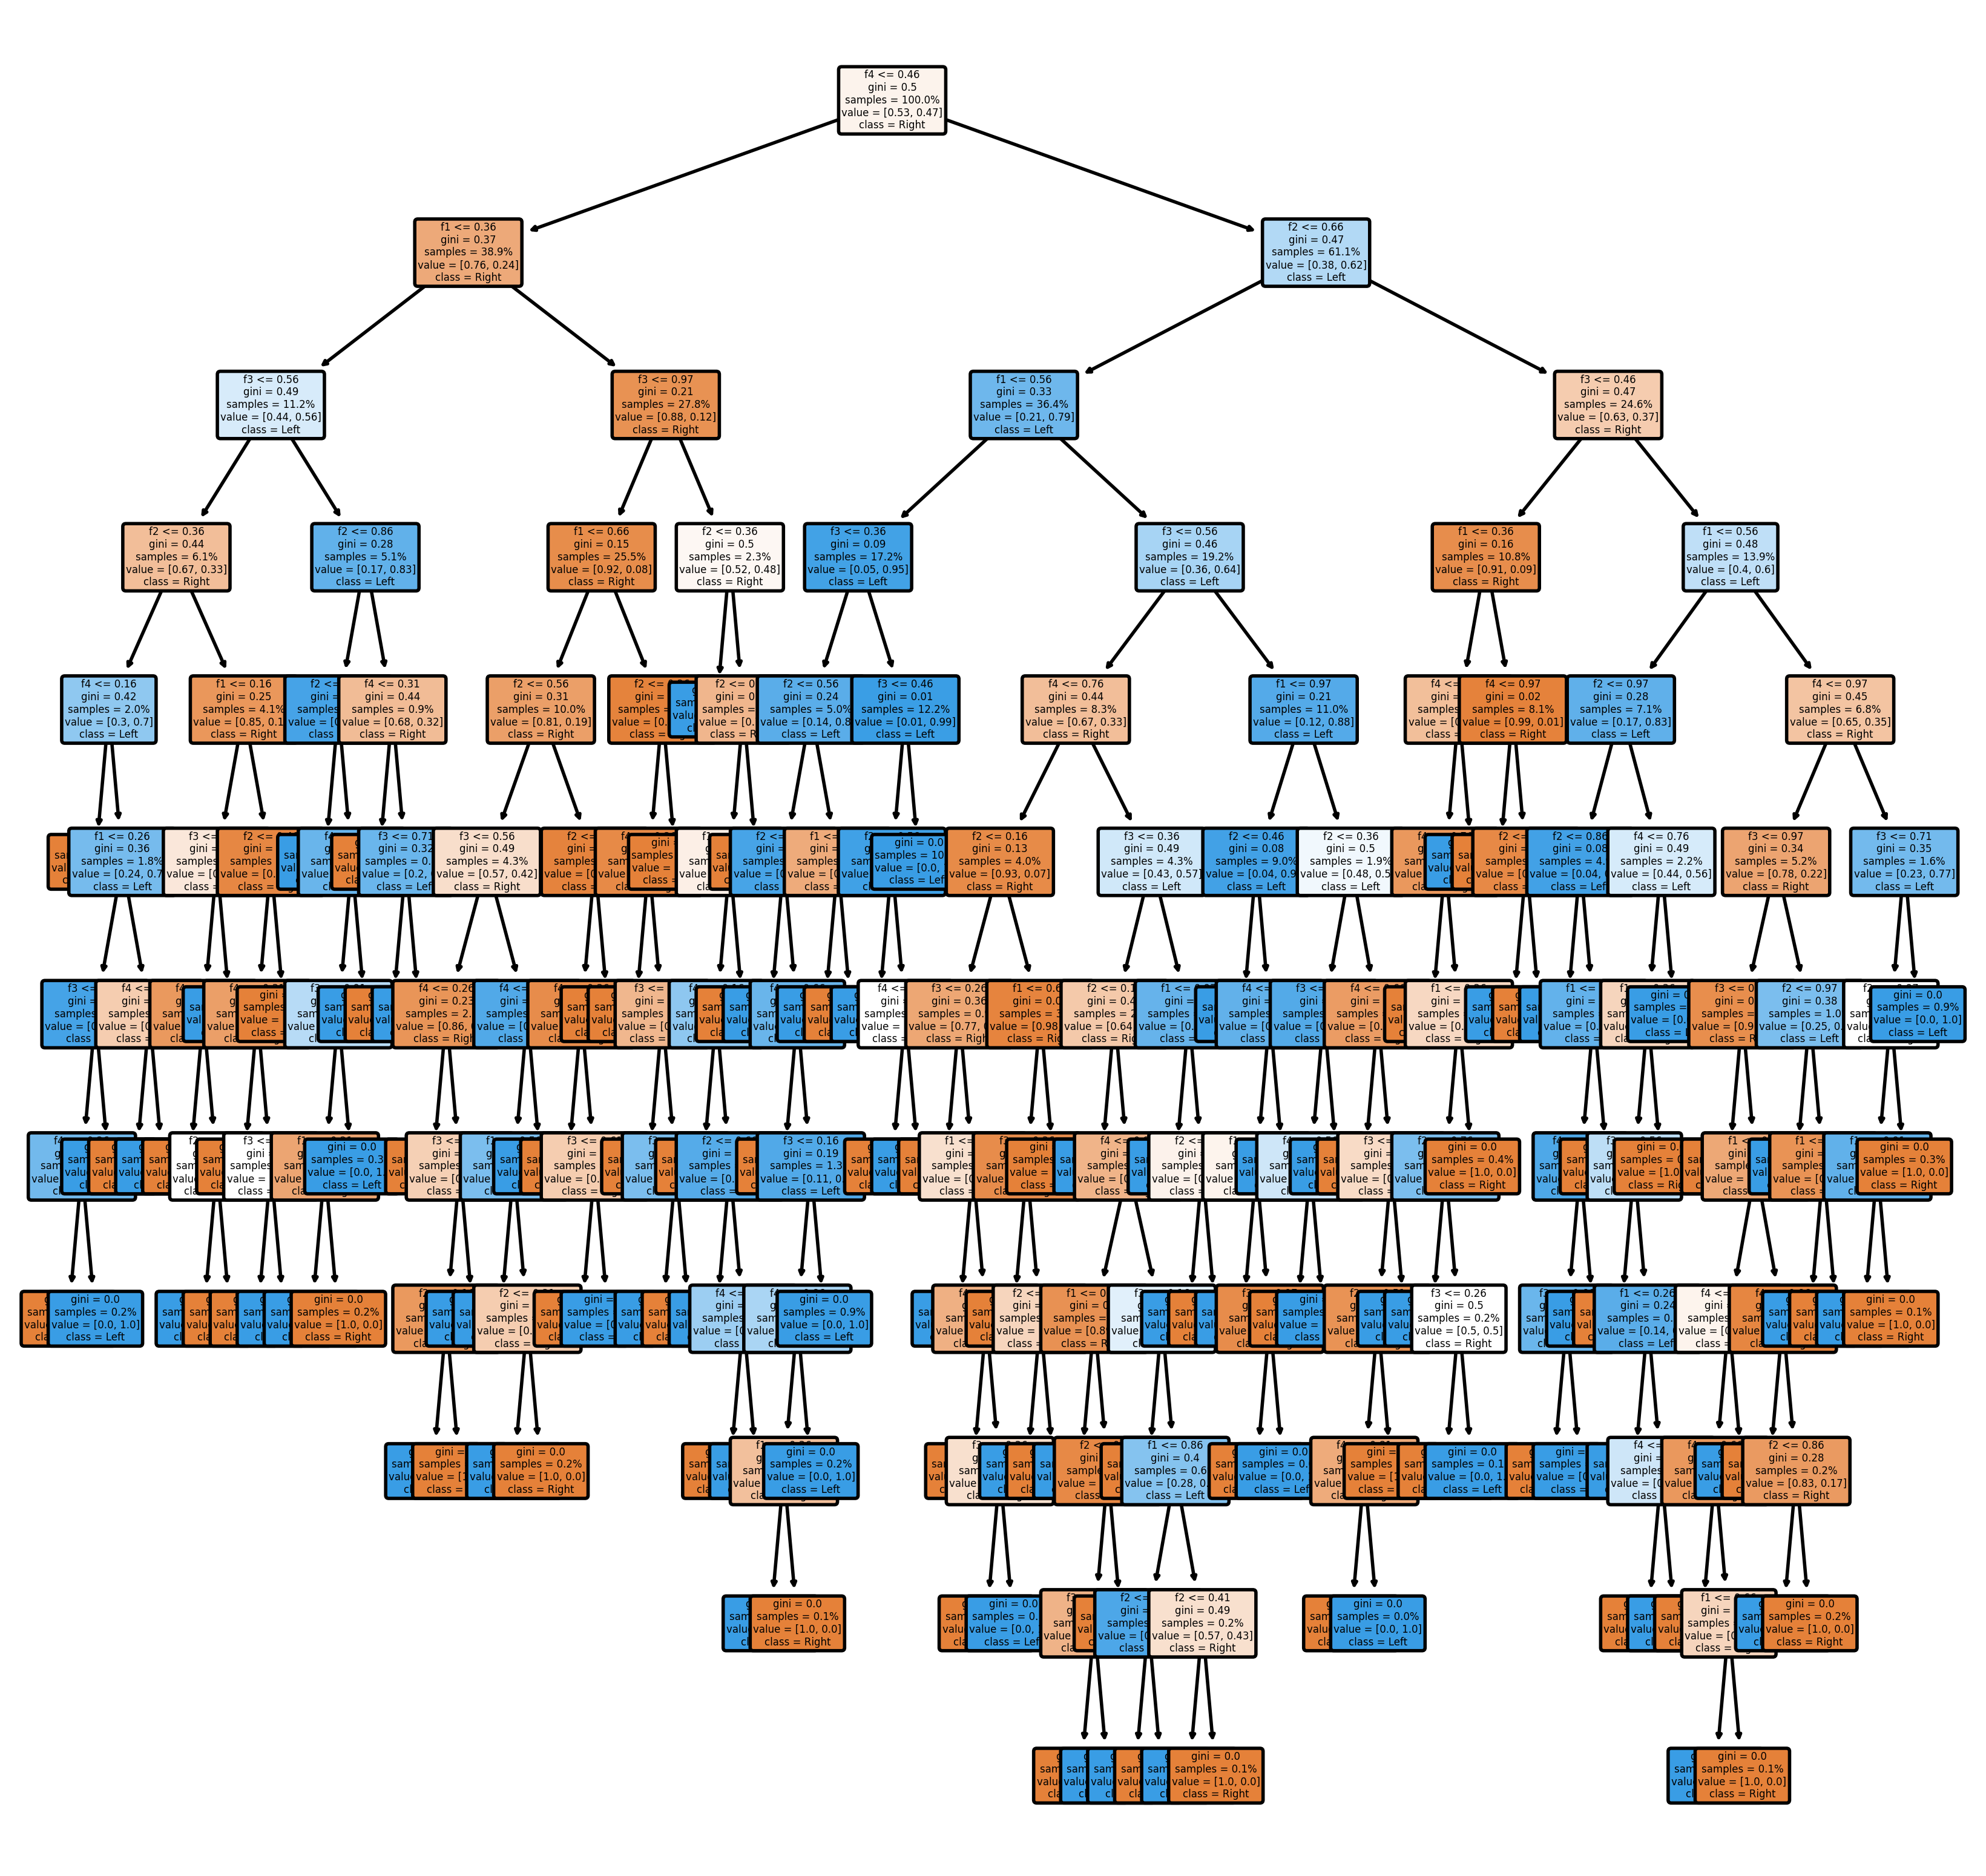

In [21]:
from matplotlib.pyplot import figure
plt.figure(dpi=400,edgecolor="r",figsize=(10,10))
F=["f1","f2","f3","f4"]
C=["Right","Left"]
plot_tree(estimator, filled=True,feature_names=F,rounded=True,precision=2,fontsize=3,proportion=True,max_depth=None,class_names=C)
plt.savefig('dt.png')
plt.show()

To make the Decision Tree more interpretable, we can use several options and parameters: 

estimator: Contains the name of the estimator of the decision tree.
filled=True: Fills the nodes with the color of their class.
feature_names=F: Contains the labels of the feature array.
rounded=True: Rounds the borders of the nodes.
precision=2: The number of digits displayed for Gini impurity.
fontsize=3: Must be adapted to the graph like figsize and dpi.
proportion=True: When True, the values will be proportions and percentages.
max_depth=None: Limits the maximum depth of the graph. None displays the whole graph.
class_names=C: Contains the labels of the class array.

# Creating arrays to parse the tree structure

In [22]:
loaded_model = pickle.load(open('dt_autopilot.pkl', 'rb'))

In [23]:
# count the number of nodes
n_nodes = loaded_model.tree_.node_count
# get the ID of the left child of a node
children_left = loaded_model.tree_.children_left
# get the ID of the right child of a node
children_right = loaded_model.tree_.children_right
# We can also view the feature (attribute) used to split the node into the left and right child nodes:
feature = loaded_model.tree_.feature
# A threshold attribute will show the value at the node:
threshold = loaded_model.tree_.threshold
# The above are useful for the Explainability of the Decision Tree

# Explaining the Decision Tree structure and the Decision Process

parsing the tree structure

In [24]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # the seed is the root node id and its parent depth

In [25]:
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # Exploring the test mode
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

Once the decision tree structure's attribute arrays have been parsed, the program prints the structure:

In [26]:
print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)

The binary tree structure has 255 nodes and has the following tree structure:


In [27]:
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))

node=0 test node: go to node 1 if X[:, 3] <= 0.4599999934434891 else to node 92.
	node=1 test node: go to node 2 if X[:, 0] <= 0.35999999940395355 else to node 45.
		node=2 test node: go to node 3 if X[:, 2] <= 0.5600000023841858 else to node 30.
			node=3 test node: go to node 4 if X[:, 1] <= 0.35999999940395355 else to node 15.
				node=4 test node: go to node 5 if X[:, 3] <= 0.1599999964237213 else to node 6.
					node=5 leaf node.
					node=6 test node: go to node 7 if X[:, 0] <= 0.25999999791383743 else to node 12.
						node=7 test node: go to node 8 if X[:, 2] <= 0.1599999964237213 else to node 11.
							node=8 test node: go to node 9 if X[:, 3] <= 0.25999999791383743 else to node 10.
								node=9 leaf node.
								node=10 leaf node.
							node=11 leaf node.
						node=12 test node: go to node 13 if X[:, 3] <= 0.35999999940395355 else to node 14.
							node=13 leaf node.
							node=14 leaf node.
				node=15 test node: go to node 16 if X[:, 0] <= 0.1599999964237213 else to

Display the top decision layers

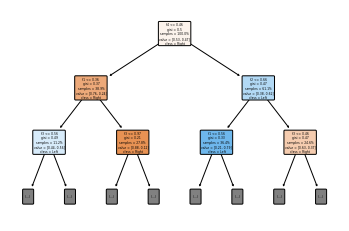

<Figure size 24000x24000 with 0 Axes>

In [33]:
plot_tree(loaded_model, filled=True, feature_names=F, rounded=True,
precision=2, fontsize=3, proportion=True, max_depth=2,
class_names=C)
plt.savefig('dt_top.png')
plt.figure(dpi=1200, edgecolor="r", figsize=(20, 20))
plt.show()

We saw that this large decision tree appears to achieve perfect accuracy. 

But we don't know if the decision is to stay in the lane or not and whether one or more pedestrians are likely to be killed. 

We can set an alert to deactivate a model if necessary. 

The default output of a default decision tree structure is complext and not easy to interpret. 
If a problem occurs and the autopilot kills somebody, an investigation will be conducted, and this will either lead to a plausible explanation or a lawsuit.
A user will first accept an explanation but rapidly start asking what-if questions. Let's answer two of the most common ones that come up during a project.

Question 1. Why are there so many nodes? What if we reduced the number of nodes?
Comment: These are interesting questions. The user is willing to use the software and help control the results of the model before it goes into production. However, the user does not understand what they are looking at!

This is a very large tree. 
We will go back to the code and decide to customize the decision tree classifier:
We can run the experiment again restricting the tree size

In [34]:
estimator = DecisionTreeClassifier(max_depth=2,max_leaf_nodes=3,min_samples_leaf=100) # here we set the decision tree parameters
# We could penalise the tree growth after building the tree (prune the tree)
# But we could also in advance restrict the tree growth
# The maximum depth of the tree is limited to 2. 
# The maximum number of leaf nodes is limited to 3
# We limit a single node to 100 records, after which the tree should grow (node splits)
# One of the two definitions is to be commented out - they are left on here just as an example - the last definition holds

In [114]:
# Now we train the Decision Tree

In [35]:
estimator = estimator.fit(X_train,y_train)

In [36]:
print("Decision")

Decision


In [37]:
y_pred = estimator.predict(X_test)

In [38]:
print(y_pred)

[0 0 1 ... 1 0 0]


Let's see how well the Decision Tree has learned 

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7483333333333333


In [120]:
# Note that Accuracy is not the best metric to employ in classification; however, here there are no misclassifications at all. 

Next we save the Trained Decision Tree

In [40]:
pickle.dump(estimator, open("dt_autopilot_controlled.pkl", 'wb'))

# Inspecting the Simplified Decision Tree

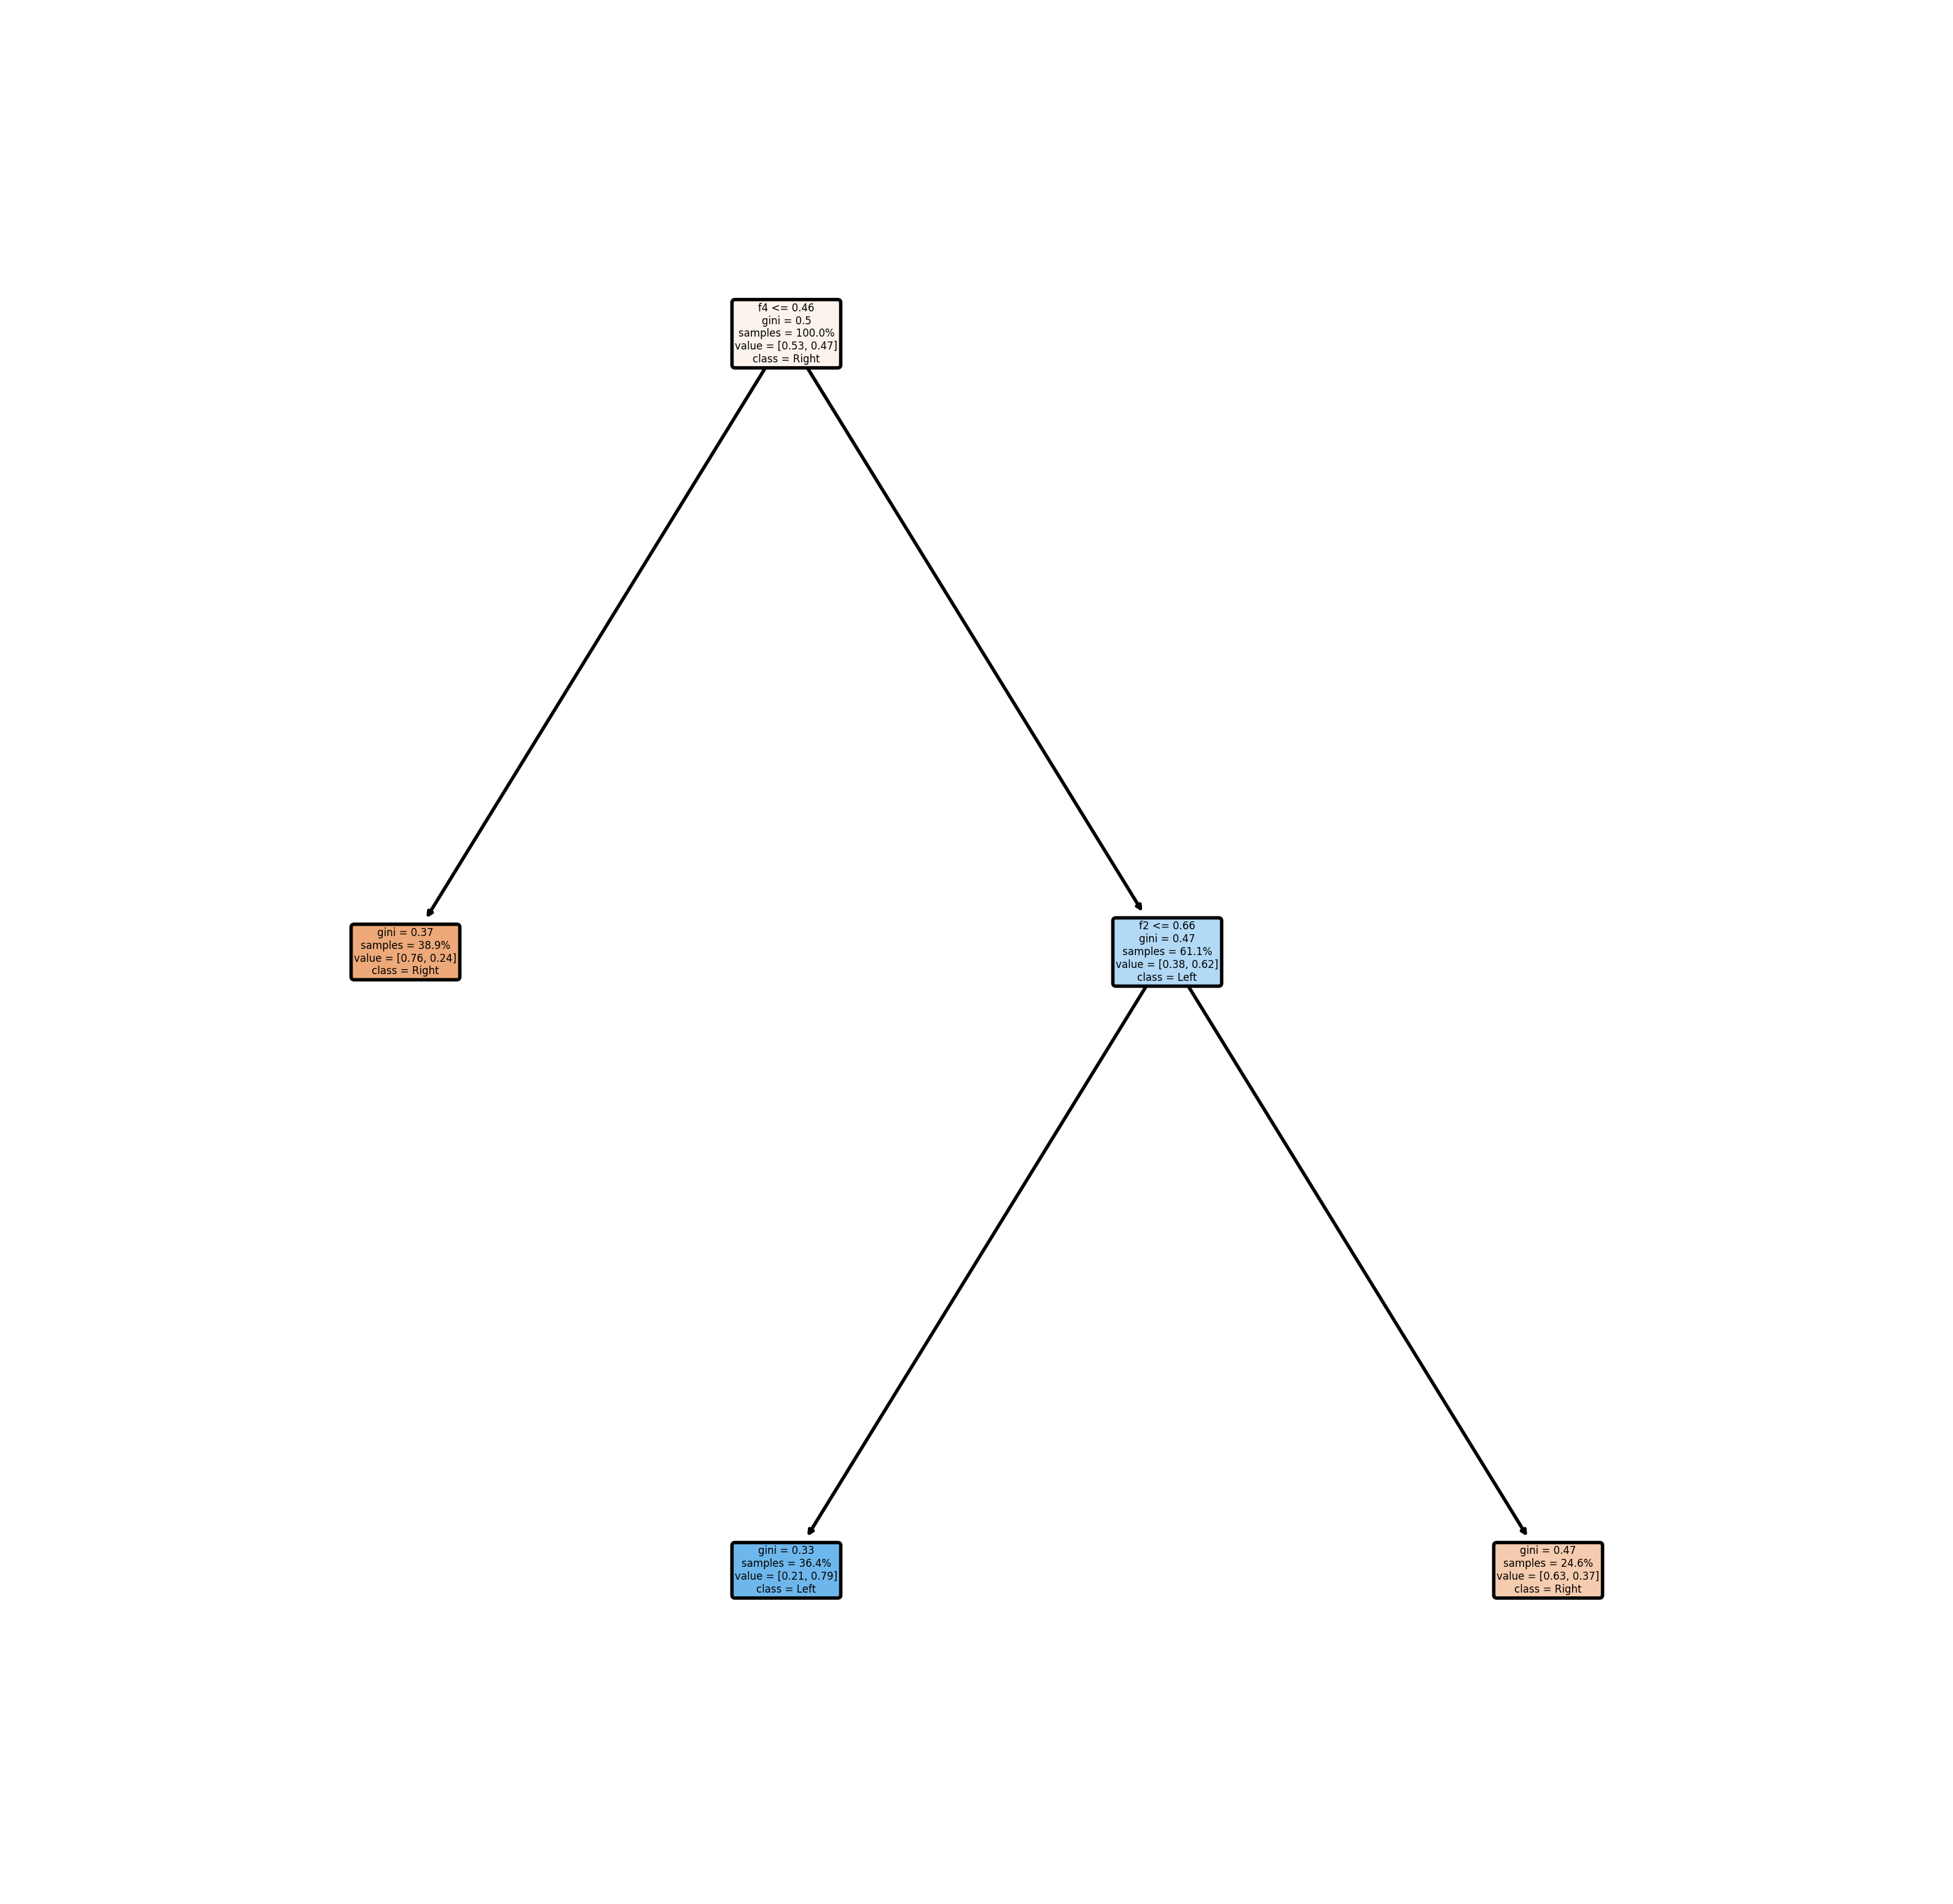

In [41]:
from matplotlib.pyplot import figure
plt.figure(dpi=400,edgecolor="r",figsize=(10,10))
F=["f1","f2","f3","f4"]
C=["Right","Left"]
plot_tree(estimator, filled=True,feature_names=F,rounded=True,precision=2,fontsize=3,proportion=True,max_depth=None,class_names=C)
plt.savefig('dt_controlled.png')
plt.show()

The result is a small and easy tree to understand and is self-explanatory:

In [42]:
loaded_model = pickle.load(open('dt_autopilot_controlled.pkl', 'rb'))

In [43]:
# count the number of nodes
n_nodes = loaded_model.tree_.node_count
# get the ID of the left child of a node
children_left = loaded_model.tree_.children_left
# get the ID of the right child of a node
children_right = loaded_model.tree_.children_right
# We can also view the feature (attribute) used to split the node into the left and right child nodes:
feature = loaded_model.tree_.feature
# A threshold attribute will show the value at the node:
threshold = loaded_model.tree_.threshold
# The above are useful for the Explainability of the Decision Tree

# Explaining the Decision Tree structure and the Decision Process

parsing the tree structure

In [44]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # the seed is the root node id and its parent depth

In [45]:
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # Exploring the test mode
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

Once the decision tree structure's attribute arrays have been parsed, the program prints the structure:

In [46]:
print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)

The binary tree structure has 5 nodes and has the following tree structure:


In [47]:
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))

node=0 test node: go to node 1 if X[:, 3] <= 0.4599999934434891 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 1] <= 0.6599999964237213 else to node 4.
		node=3 leaf node.
		node=4 leaf node.


Clearly this simplified tree is much easier to interpert!

# Considering Bias and Ethics

Load again the larger Decision Tree

In [48]:
loaded_model = pickle.load(open('dt_autopilot.pkl', 'rb'))

In [49]:
# count the number of nodes
n_nodes = loaded_model.tree_.node_count
# get the ID of the left child of a node
children_left = loaded_model.tree_.children_left
# get the ID of the right child of a node
children_right = loaded_model.tree_.children_right
# We can also view the feature (attribute) used to split the node into the left and right child nodes:
feature = loaded_model.tree_.feature
# A threshold attribute will show the value at the node:
threshold = loaded_model.tree_.threshold
# The above are useful for the Explainability of the Decision Tree

# Double check: explaining the Decision Tree structure and the Decision Process

parsing the tree structure

In [50]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # the seed is the root node id and its parent depth

In [51]:
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # Exploring the test mode
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

Once the decision tree structure's attribute arrays have been parsed, the program prints the structure:

In [52]:
print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)

The binary tree structure has 255 nodes and has the following tree structure:


In [53]:
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))

node=0 test node: go to node 1 if X[:, 3] <= 0.4599999934434891 else to node 92.
	node=1 test node: go to node 2 if X[:, 0] <= 0.35999999940395355 else to node 45.
		node=2 test node: go to node 3 if X[:, 2] <= 0.5600000023841858 else to node 30.
			node=3 test node: go to node 4 if X[:, 1] <= 0.35999999940395355 else to node 15.
				node=4 test node: go to node 5 if X[:, 3] <= 0.1599999964237213 else to node 6.
					node=5 leaf node.
					node=6 test node: go to node 7 if X[:, 0] <= 0.25999999791383743 else to node 12.
						node=7 test node: go to node 8 if X[:, 2] <= 0.1599999964237213 else to node 11.
							node=8 test node: go to node 9 if X[:, 3] <= 0.25999999791383743 else to node 10.
								node=9 leaf node.
								node=10 leaf node.
							node=11 leaf node.
						node=12 test node: go to node 13 if X[:, 3] <= 0.35999999940395355 else to node 14.
							node=13 leaf node.
							node=14 leaf node.
				node=15 test node: go to node 16 if X[:, 0] <= 0.1599999964237213 else to

In [57]:
t=0 #true predictions
f=0 #false predictions

In [58]:
for i in range(0,100):
    xf1=autopilot_data_df.at[i,'f1']
    xf2=autopilot_data_df.at[i,'f2']
    xf3=autopilot_data_df.at[i,'f3']
    xf4=autopilot_data_df.at[i,'f4']
    xclass=autopilot_data_df.at[i,'label']
    b1=-0.01;b2=0.02;b3=.03;b4=.02
    xf1=round(xf1*b1,2)
    xf2=round(xf2*b2,2)
    xf3=round(xf3*b3,2)
    xf4=round(xf4*b4,2)
    X_DL = [[xf1,xf2,xf3,xf4]]
    prediction =loaded_model.predict(X_DL)
    e=False
    if(prediction==xclass):
        e=True
        t+=1
    if(prediction!=xclass):
        e=False
        f+=1
    choices=str(prediction).strip('[]')
    if float(choices)<=1:
        choice="R lane" 
    if float(choices)>=1:
        choice="L lane" 
    if float(b1+b2+b3+b4)<=0.1:
        print("Alert! Kill Switch activated!")
#        break
    print (i+1,"data",X_DL," prediction:",str(prediction).strip('[]'),"class",xclass,"acc.:",e,choice)  

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

Alert! Kill Switch activated!
1 data [[-0.01, 0.01, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
2 data [[-0.0, 0.01, 0.03, 0.0]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
3 data [[-0.01, 0.01, 0.02, 0.0]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
4 data [[-0.0, 0.01, 0.03, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
5 data [[-0.01, 0.02, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
6 data [[-0.01, 0.01, 0.03, 0.02]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
7 data [[-0.01, 0.02, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
8 data [[-0.0, 0.02, 0.03, 0.0]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
9 data [[-0.01, 0.01, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
10 data [[-0.01, 0

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

0 class 1 acc.: False R lane
Alert! Kill Switch activated!
33 data [[-0.01, 0.0, 0.03, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
34 data [[-0.0, 0.02, 0.02, 0.02]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
35 data [[-0.01, 0.01, 0.02, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
36 data [[-0.01, 0.01, 0.02, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
37 data [[-0.01, 0.01, 0.02, 0.02]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
38 data [[-0.0, 0.01, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
39 data [[-0.01, 0.0, 0.02, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
40 data [[-0.01, 0.01, 0.0, 0.02]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
41 data [[-0.0, 0.01, 0.03, 0.02]]  prediction: 0 class 1 acc.: False R lane
Alert! Ki

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

 [[-0.0, 0.0, 0.03, 0.0]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
49 data [[-0.0, 0.02, 0.02, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
50 data [[-0.0, 0.01, 0.02, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
51 data [[-0.01, 0.0, 0.02, 0.02]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
52 data [[-0.0, 0.01, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
53 data [[-0.01, 0.02, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
54 data [[-0.0, 0.0, 0.02, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
55 data [[-0.01, 0.0, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
56 data [[-0.01, 0.01, 0.0, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
57 data [[-0.01, 0.01, 0.01, 0.01]]  prediction: 0 cl

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

Alert! Kill Switch activated!
64 data [[-0.01, 0.02, 0.0, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
65 data [[-0.01, 0.0, 0.02, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
66 data [[-0.01, 0.01, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
67 data [[-0.01, 0.01, 0.02, 0.02]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
68 data [[-0.01, 0.0, 0.0, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
69 data [[-0.0, 0.01, 0.0, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
70 data [[-0.01, 0.01, 0.02, 0.0]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
71 data [[-0.0, 0.01, 0.02, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
72 data [[-0.01, 0.01, 0.02, 0.02]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
73 data [[-

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

Alert! Kill Switch activated!
79 data [[-0.01, 0.02, 0.03, 0.02]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
80 data [[-0.01, 0.02, 0.02, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
81 data [[-0.01, 0.01, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
82 data [[-0.01, 0.01, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
83 data [[-0.0, 0.01, 0.0, 0.02]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
84 data [[-0.01, 0.01, 0.01, 0.0]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
85 data [[-0.01, 0.01, 0.02, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
86 data [[-0.0, 0.0, 0.01, 0.02]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
87 data [[-0.01, 0.02, 0.01, 0.01]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
88 data [

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

 R lane
Alert! Kill Switch activated!
95 data [[-0.01, 0.01, 0.01, 0.02]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
96 data [[-0.0, 0.01, 0.01, 0.0]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
97 data [[-0.0, 0.01, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
98 data [[-0.0, 0.01, 0.03, 0.01]]  prediction: 0 class 1 acc.: False R lane
Alert! Kill Switch activated!
99 data [[-0.01, 0.02, 0.02, 0.02]]  prediction: 0 class 0 acc.: True R lane
Alert! Kill Switch activated!
100 data [[-0.0, 0.01, 0.02, 0.01]]  prediction: 0 class 1 acc.: False R lane


c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The program produces different predictions in some cases. You will notice that it refuses to change lanes no matter what.
The program seems to be oblivious to the accuracy of its predictions:

In [59]:
print("true:",t,"false",f,"accuracy",round(t/(t+f),3))

true: 55 false 45 accuracy 0.55


The behavior is not so clear. However, it can be likely rational. 
We have set
b1=-0.01;b2=0.02;b3=.03;b4=.02
As you can see, this bias scenario slightly favours the security of the right lane (b1, b2) and reduces that of the left lane (b3, b4).
The output will repeatedly suggest staying in the right lane:

Let's see how ethics and laws can enter the decision process.
Whenever the kill alert is activated, the autopilot can be activated. For this, we introduce a 'break' in the above loop
We also change the biases to: 

In [60]:
b1 = 0.5; b2 = 0.5; b3 = 1.1; b4 = 1.1

In [61]:
for i in range(0,100):
    xf1=autopilot_data_df.at[i,'f1']
    xf2=autopilot_data_df.at[i,'f2']
    xf3=autopilot_data_df.at[i,'f3']
    xf4=autopilot_data_df.at[i,'f4']
    xclass=autopilot_data_df.at[i,'label']
    xf1=round(xf1*b1,2)
    xf2=round(xf2*b2,2)
    xf3=round(xf3*b3,2)
    xf4=round(xf4*b4,2)
    X_DL = [[xf1,xf2,xf3,xf4]]
    prediction =loaded_model.predict(X_DL)
    e=False
    if(prediction==xclass):
        e=True
        t+=1
    if(prediction!=xclass):
        e=False
        f+=1
    choices=str(prediction).strip('[]')
    if float(choices)<=1:
        choice="R lane" 
    if float(choices)>=1:
        choice="L lane" 
    if float(b1+b2+b3+b4)<=0.1:
        print("Alert! Kill Switch activated!")
#        break
    print (i+1,"data",X_DL," prediction:",str(prediction).strip('[]'),"class",xclass,"acc.:",e,choice)  

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

1 data [[0.26, 0.2, 0.23, 0.45]]  prediction: 1 class 0 acc.: False L lane
2 data [[0.06, 0.16, 1.0, 0.12]]  prediction: 1 class 1 acc.: True L lane
3 data [[0.51, 0.26, 0.67, 0.12]]  prediction: 1 class 0 acc.: False L lane
4 data [[0.2, 0.3, 1.12, 0.67]]  prediction: 1 class 1 acc.: True L lane
5 data [[0.51, 0.46, 0.45, 0.34]]  prediction: 1 class 0 acc.: False L lane
6 data [[0.36, 0.2, 1.0, 1.12]]  prediction: 1 class 1 acc.: True L lane
7 data [[0.26, 0.46, 0.34, 0.67]]  prediction: 1 class 0 acc.: False L lane
8 data [[0.16, 0.4, 1.12, 0.12]]  prediction: 1 class 1 acc.: True L lane
9 data [[0.46, 0.3, 0.34, 0.34]]  prediction: 0 class 0 acc.: True R lane
10 data [[0.51, 0.3, 0.56, 0.12]]  prediction: 0 class 0 acc.: True R lane
11 data [[0.36, 0.26, 0.56, 0.89]]  prediction: 1 class 1 acc.: True L lane
12 data [[0.16, 0.16, 0.34, 0.34]]  prediction: 1 class 0 acc.: False L lane
13 data [[0.1, 0.46, 0.23, 0.78]]  prediction: 1 class 0 acc.: False L lane
14 data [[0.4, 0.3, 0.45,

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

 data [[0.4, 0.3, 0.67, 1.12]]  prediction: 1 class 1 acc.: True L lane
38 data [[0.16, 0.26, 0.45, 0.45]]  prediction: 1 class 0 acc.: False L lane
39 data [[0.26, 0.06, 0.56, 0.78]]  prediction: 1 class 1 acc.: True L lane
40 data [[0.26, 0.3, 0.12, 1.0]]  prediction: 1 class 0 acc.: False L lane
41 data [[0.16, 0.3, 1.12, 1.12]]  prediction: 1 class 1 acc.: True L lane
42 data [[0.4, 0.1, 0.34, 0.89]]  prediction: 1 class 1 acc.: True L lane
43 data [[0.3, 0.51, 1.0, 0.45]]  prediction: 1 class 0 acc.: False L lane
44 data [[0.3, 0.06, 0.56, 1.0]]  prediction: 1 class 1 acc.: True L lane
45 data [[0.36, 0.2, 1.0, 0.12]]  prediction: 1 class 0 acc.: False L lane
46 data [[0.4, 0.1, 1.0, 1.12]]  prediction: 1 class 1 acc.: True L lane
47 data [[0.4, 0.46, 0.67, 0.12]]  prediction: 1 class 0 acc.: False L lane
48 data [[0.16, 0.06, 1.0, 0.12]]  prediction: 1 class 1 acc.: True L lane
49 data [[0.1, 0.51, 0.56, 0.67]]  prediction: 1 class 0 acc.: False L lane
50 data [[0.2, 0.26, 0.78, 

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

54 data [[0.16, 0.1, 0.78, 0.56]]  prediction: 1 class 1 acc.: True L lane
55 data [[0.46, 0.1, 0.34, 0.34]]  prediction: 1 class 0 acc.: False L lane
56 data [[0.26, 0.16, 0.12, 0.34]]  prediction: 1 class 0 acc.: False L lane
57 data [[0.46, 0.3, 0.34, 0.34]]  prediction: 0 class 0 acc.: True R lane
58 data [[0.51, 0.16, 0.34, 1.0]]  prediction: 1 class 0 acc.: False L lane
59 data [[0.1, 0.06, 0.45, 0.78]]  prediction: 1 class 1 acc.: True L lane
60 data [[0.4, 0.2, 0.56, 0.78]]  prediction: 1 class 0 acc.: False L lane
61 data [[0.3, 0.4, 0.78, 0.12]]  prediction: 1 class 0 acc.: False L lane
62 data [[0.1, 0.2, 0.34, 0.45]]  prediction: 1 class 1 acc.: True L lane
63 data [[0.51, 0.1, 0.89, 0.67]]  prediction: 1 class 1 acc.: True L lane
64 data [[0.36, 0.46, 0.12, 0.45]]  prediction: 0 class 0 acc.: True R lane
65 data [[0.36, 0.06, 0.67, 0.56]]  prediction: 1 class 1 acc.: True L lane
66 data [[0.3, 0.36, 0.45, 0.67]]  prediction: 1 class 0 acc.: False L lane
67 data [[0.51, 0.3

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

 class 1 acc.: True L lane
74 data [[0.46, 0.46, 0.89, 1.0]]  prediction: 1 class 0 acc.: False L lane
75 data [[0.36, 0.2, 0.67, 0.89]]  prediction: 1 class 1 acc.: True L lane
76 data [[0.26, 0.4, 0.23, 0.89]]  prediction: 1 class 0 acc.: False L lane
77 data [[0.3, 0.3, 0.56, 0.34]]  prediction: 0 class 0 acc.: True R lane
78 data [[0.2, 0.2, 0.56, 0.45]]  prediction: 1 class 1 acc.: True L lane
79 data [[0.46, 0.51, 1.12, 0.89]]  prediction: 1 class 0 acc.: False L lane
80 data [[0.46, 0.4, 0.67, 0.34]]  prediction: 1 class 0 acc.: False L lane
81 data [[0.51, 0.3, 0.45, 0.78]]  prediction: 1 class 0 acc.: False L lane
82 data [[0.46, 0.2, 0.23, 0.34]]  prediction: 0 class 0 acc.: True R lane
83 data [[0.06, 0.36, 0.12, 0.89]]  prediction: 1 class 1 acc.: True L lane
84 data [[0.3, 0.16, 0.23, 0.12]]  prediction: 0 class 0 acc.: True R lane
85 data [[0.46, 0.2, 0.78, 0.78]]  prediction: 1 class 1 acc.: True L lane
86 data [[0.1, 0.06, 0.23, 1.0]]  prediction: 1 class 1 acc.: True L

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

90 data [[0.4, 0.46, 0.78, 0.67]]  prediction: 1 class 0 acc.: False L lane
91 data [[0.26, 0.46, 0.78, 0.78]]  prediction: 1 class 0 acc.: False L lane
92 data [[0.26, 0.3, 1.12, 0.23]]  prediction: 1 class 1 acc.: True L lane
93 data [[0.4, 0.4, 0.45, 0.78]]  prediction: 1 class 0 acc.: False L lane
94 data [[0.16, 0.4, 0.89, 0.45]]  prediction: 1 class 1 acc.: True L lane
95 data [[0.26, 0.36, 0.23, 1.12]]  prediction: 1 class 1 acc.: True L lane
96 data [[0.16, 0.2, 0.34, 0.23]]  prediction: 1 class 0 acc.: False L lane
97 data [[0.1, 0.2, 0.12, 0.12]]  prediction: 0 class 0 acc.: True R lane
98 data [[0.1, 0.3, 1.12, 0.56]]  prediction: 1 class 1 acc.: True L lane
99 data [[0.46, 0.51, 0.67, 1.12]]  prediction: 1 class 0 acc.: False L lane
100 data [[0.1, 0.2, 0.78, 0.56]]  prediction: 1 class 1 acc.: True L lane


c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

Clearly the introduction of different weights has changed the decision making; now the L lane is chosen all the time. 

In [62]:
for i in range(0,100):
    xf1=autopilot_data_df.at[i,'f1']
    xf2=autopilot_data_df.at[i,'f2']
    xf3=autopilot_data_df.at[i,'f3']
    xf4=autopilot_data_df.at[i,'f4']
    xclass=autopilot_data_df.at[i,'label']
    xf1=round(xf1*b1,0)
    xf2=round(xf2*b2,0)
    xf3=round(xf3*b3,0)
    xf4=round(xf4*b4,0)
    X_DL = [[xf1,xf2,xf3,xf4]]
    prediction =loaded_model.predict(X_DL)
    e=False
    if(prediction==xclass):
        e=True
        t+=1
    if(prediction!=xclass):
        e=False
        f+=1
    choices=str(prediction).strip('[]')
    if float(choices)<=1:
        choice="R lane" 
    if float(choices)>=1:
        choice="L lane" 
    if float(b1+b2+b3+b4)<=0.1:
        print("Alert! Kill Switch activated!")
#        break
    print (i+1,"data",X_DL," prediction:",str(prediction).strip('[]'),"class",xclass,"acc.:",e,choice)  

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

1 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
2 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 1 acc.: True L lane
3 data [[1.0, 0.0, 1.0, 0.0]]  prediction: 1 class 0 acc.: False L lane
4 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
5 data [[1.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
6 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
7 data [[0.0, 0.0, 0.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
8 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 1 acc.: True L lane
9 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
10 data [[1.0, 0.0, 1.0, 0.0]]  prediction: 1 class 0 acc.: False L lane
11 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
12 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
13 data [[0.0, 0.0, 0.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
14 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R la

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
22 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 0 acc.: False L lane
23 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
24 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
25 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 1 acc.: True L lane
26 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
27 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
28 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
29 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
30 data [[1.0, 0.0, 1.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
31 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 0 acc.: False L lane
32 data [[0.0, 1.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
33 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
34 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: Tr

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

  prediction: 1 class 0 acc.: False L lane
61 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 0 acc.: False L lane
62 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 1 acc.: False R lane
63 data [[1.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
64 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
65 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
66 data [[0.0, 0.0, 0.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
67 data [[1.0, 0.0, 1.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
68 data [[0.0, 0.0, 0.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
69 data [[0.0, 0.0, 0.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
70 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 0 acc.: False L lane
71 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 1 acc.: True L lane
72 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
73 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 1 acc.: True L lane
74 data [[0.0, 

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

76 data [[0.0, 0.0, 0.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
77 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 0 acc.: False L lane
78 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 1 acc.: True L lane
79 data [[0.0, 1.0, 1.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
80 data [[0.0, 0.0, 1.0, 0.0]]  prediction: 1 class 0 acc.: False L lane
81 data [[1.0, 0.0, 0.0, 1.0]]  prediction: 1 class 0 acc.: False L lane
82 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
83 data [[0.0, 0.0, 0.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
84 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
85 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
86 data [[0.0, 0.0, 0.0, 1.0]]  prediction: 1 class 1 acc.: True L lane
87 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
88 data [[0.0, 0.0, 0.0, 0.0]]  prediction: 0 class 0 acc.: True R lane
89 data [[0.0, 0.0, 1.0, 1.0]]  prediction: 1 class 1 acc.:

c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\t

In this experiment, decisions are going both ways

Finally, we may decide to deactivate the autopilot whenever a Kill decision is reached by the DT

In [64]:
for i in range(0,100):
    xf1=autopilot_data_df.at[i,'f1']
    xf2=autopilot_data_df.at[i,'f2']
    xf3=autopilot_data_df.at[i,'f3']
    xf4=autopilot_data_df.at[i,'f4']
    xclass=autopilot_data_df.at[i,'label']
    b1=-0.01;b2=0.02;b3=.03;b4=.02
    xf1=round(xf1*b1,2)
    xf2=round(xf2*b2,2)
    xf3=round(xf3*b3,2)
    xf4=round(xf4*b4,2)
    X_DL = [[xf1,xf2,xf3,xf4]]
    prediction =loaded_model.predict(X_DL)
    e=False
    if(prediction==xclass):
        e=True
        t+=1
    if(prediction!=xclass):
        e=False
        f+=1
    choices=str(prediction).strip('[]')
    if float(choices)<=1:
        choice="R lane" 
    if float(choices)>=1:
        choice="L lane" 
    if float(b1+b2+b3+b4)<=1.0:
        print("Alert! Kill Switch activated!")
        break
    print (i+1,"data",X_DL," prediction:",str(prediction).strip('[]'),"class",xclass,"acc.:",e,choice)  

Alert! Kill Switch activated!


c:\Users\tobia\miniconda3\envs\sio\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


We could add driving recommendations that alert the human driver to go through the area ahead at a very low speed.
We have just taught our autopilot to fear areas that may lead to accidents and lawsuits.
We have implemented a decision tree and provided it with traffic constraints. We enhanced the autopilot with an ethical kill switch teaching a machine to "fear" the law.
This demonstrates how managing bias can lead to outcomes which are at different sides of ethical and moral dillemas. 